# EMDAT

In [2]:
# For multiple output per cell
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [3]:
#!pip install xlrd -q # For Excel support in pandas
# sudo npm install -g electron@6.1.4 orca --unsafe-perm=true --allow-root # For output SVG

In [4]:
import pandas as pd
import plotly.graph_objects as go

In [5]:
DATASET_FOLDER = "../../datasets/"
!ls $DATASET_FOLDER

 emdat_public_2020_09_12_query_uid-tAnKEX.xlsx
'Plateforme - désastres climatiques.pdf'
 pr_1901_1930_AND.csv
 pr_1931_1960_FRA.csv
 pr_2060_2079_mavg_rcp85_FRA.csv
 precipitation
 rx1day_2020_2039_manom_rcp26_AGO.csv


In [6]:
df = pd.read_excel(
    DATASET_FOLDER + "emdat_public_2020_09_12_query_uid-tAnKEX.xlsx",
    skiprows=5,
    header=1,
)
df.head(3)

,Dis No,Year,Seq,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Entry Criteria,...,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI
0,1900-9002-CPV,1900,9002,Natural,Climatological,Drought,Drought,NaN,NaN,NaN,...,NaN,11000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.261389
1,1900-9001-IND,1900,9001,Natural,Climatological,Drought,Drought,NaN,NaN,NaN,...,NaN,1250000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.261389
2,1901-0003-BEL,1901,3,Technological,Technological,Industrial accident,Explosion,NaN,Coal mine,Kill,...,27.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.261389


In [7]:
df.columns

Index(['Dis No', 'Year', 'Seq', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Entry Criteria', 'Country', 'ISO', 'Region', 'Continent',
       'Location', 'Origin', 'Associated Dis', 'Associated Dis2',
       'OFDA Response', 'Appeal', 'Declaration', 'Aid Contribution',
       'Dis Mag Value', 'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time',
       'River Basin', 'Start Year', 'Start Month', 'Start Day', 'End Year',
       'End Month', 'End Day', 'Total Deaths', 'No Injured', 'No Affected',
       'No Homeless', 'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Insured Damages ('000 US$)', 'Total Damages ('000 US$)', 'CPI'],
      dtype='object')

In [8]:
df["Disaster Group"].value_counts()
df["Disaster Subgroup"].value_counts()
df["Disaster Type"].value_counts()

Natural              15568
Technological         8938
Complex Disasters       14
Name: Disaster Group, dtype: int64

Technological        8938
Hydrological         6038
Meteorological       4926
Geophysical          1820
Biological           1589
Climatological       1194
Complex Disasters      14
Extra-terrestrial       1
Name: Disaster Subgroup, dtype: int64

Transport accident        5934
Flood                     5277
Storm                     4328
Earthquake                1519
Industrial accident       1515
Epidemic                  1492
Miscellaneous accident    1489
Landslide                  761
Drought                    747
Extreme temperature        597
Wildfire                   447
Volcanic activity          253
Insect infestation          96
Mass movement (dry)         48
Complex Disasters           14
Impact                       1
Fog                          1
Animal accident              1
Name: Disaster Type, dtype: int64

In [56]:
df = df[df["Disaster Type"] == "Flood"]
df.head(3)
df["Disaster Subtype"].value_counts()

,Dis No,Year,Seq,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Entry Criteria,...,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI
16,1906-0023-BEL,1906,23,Natural,Hydrological,Flood,NaN,NaN,NaN,Govern,...,14.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.522300
17,1906-0024-BEL,1906,24,Natural,Hydrological,Flood,NaN,NaN,NaN,Govern,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.522300
50,1911-0002-CHN,1911,2,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,Kill,...,NaN,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.652756


Riverine flood    2647
Flash flood        719
Coastal flood       85
Name: Disaster Subtype, dtype: int64

In [75]:
df.describe()

,Year,Seq,Aid Contribution,Dis Mag Value,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI
count,5277.000000,5277.000000,3.440000e+02,1.773000e+03,5277.000000,5226.000000,4348.000000,5277.000000,5227.000000,4336.000000,3.854000e+03,823.000000,3.780000e+03,9.430000e+02,4.384000e+03,1.200000e+01,2.250000e+02,1.770000e+03,5186.000000
mean,2000.214137,295.040743,2.324020e+05,9.201415e+04,2000.214137,6.649062,15.149724,2000.229297,6.730821,15.864622,1.813385e+03,1665.366950,9.996682e+05,9.832855e+04,8.834033e+05,2.762494e+05,3.527163e+05,4.741781e+05,68.433748
std,15.770086,207.385096,4.205224e+06,2.070849e+05,15.770098,3.148156,8.857452,15.776241,3.150828,8.824020,6.828541e+04,14506.765863,8.379805e+06,6.748447e+05,7.966286e+06,4.444794e+05,8.224553e+05,1.877134e+06,24.302576
min,1900.000000,1.000000,5.000000e+00,2.000000e+00,1900.000000,1.000000,1.000000,1900.000000,1.000000,1.000000,1.000000e+00,1.000000,2.000000e+01,9.000000e+00,2.000000e+00,8.400000e+01,2.000000e+02,3.000000e+00,3.261389
25%,1993.000000,110.000000,1.447500e+02,4.200000e+03,1993.000000,4.000000,8.000000,1993.000000,4.000000,8.000000,6.000000e+00,11.000000,2.018750e+03,1.000000e+03,1.870750e+03,4.575000e+03,4.400000e+04,6.038500e+03,56.504646
50%,2004.000000,268.000000,6.165000e+02,2.468000e+04,2004.000000,7.000000,15.000000,2004.000000,7.000000,16.000000,1.700000e+01,32.000000,1.448700e+04,5.000000e+03,1.130050e+04,6.877400e+04,1.290000e+05,4.755550e+04,73.881412
75%,2011.000000,452.000000,2.787000e+03,8.400000e+04,2011.000000,9.000000,23.000000,2011.000000,9.000000,24.000000,5.000000e+01,107.500000,1.000000e+05,2.000000e+04,8.046475e+04,2.800000e+05,3.700000e+05,2.530000e+05,87.984603
max,2020.000000,920.000000,7.800000e+07,2.857000e+06,2020.000000,12.000000,31.000000,2020.000000,12.000000,31.000000,3.700000e+06,249378.000000,2.230000e+08,1.585000e+07,2.389730e+08,1.440751e+06,1.000000e+07,4.000000e+07,100.000000


5 277 flood disasters but :
*    12 with reconstruction cost (too few we can't use it)
*   225 with Insured Damages (too few)
* 1 770 with Total Damages
* 3 854 with Deaths
* 3 780 with Affected
*   823 with Injured (too few)
*   943 with Homeless (too few)


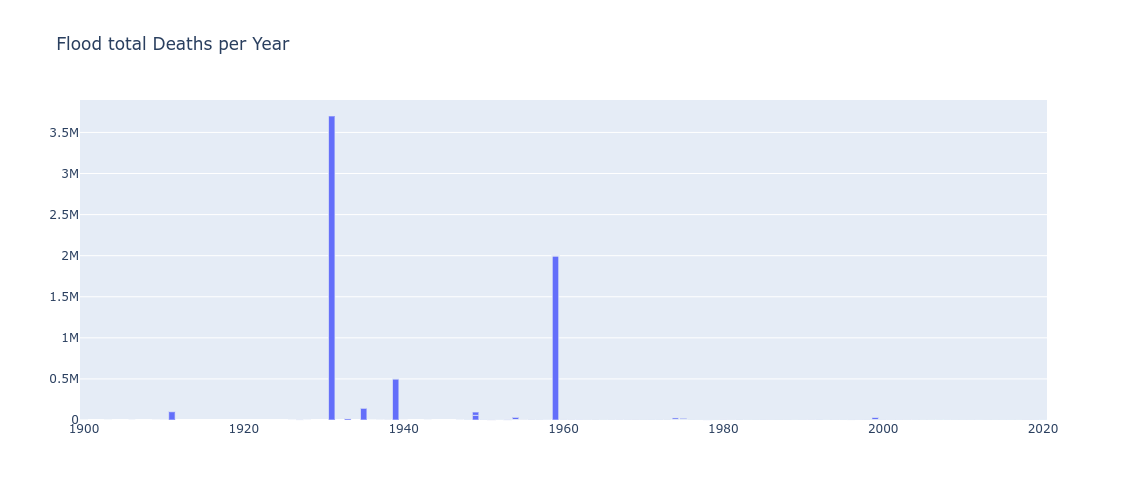

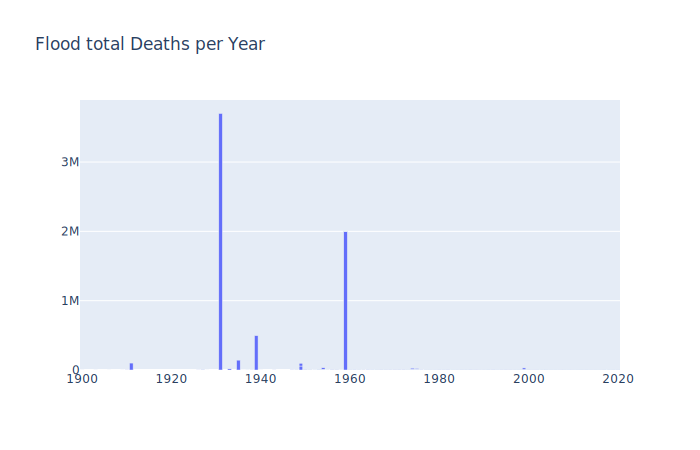

In [63]:
fig = go.Figure(
    data=[go.Bar(x=df["Year"], y=df["Total Deaths"])],
    layout_title_text="Flood total Deaths per Year",
)

fig.update_layout(autosize=True, width=1024, height=500)  # For interactive plot
fig.show(renderer="svg")  # Static plot for GitHub

In [11]:
df_huge_deaths = df[df["Total Deaths"] > 1_000_000]
df_huge_deaths.head(3)

,Dis No,Year,Seq,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Entry Criteria,...,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI
178,1931-0007-CHN,1931,7,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,Kill,...,NaN,3700000.0,NaN,NaN,NaN,NaN,NaN,NaN,1400000.0,5.961819
496,1959-0006-CHN,1959,6,Natural,Hydrological,Flood,NaN,NaN,NaN,Kill,...,NaN,2000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.401980


In [12]:
df_low_deaths = df[df["Total Deaths"] < 40_000]
df_low_deaths.head(3)

,Dis No,Year,Seq,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Entry Criteria,...,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI
16,1906-0023-BEL,1906,23,Natural,Hydrological,Flood,NaN,NaN,NaN,Govern,...,14.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.522300
145,1927-0012-DZA,1927,12,Natural,Hydrological,Flood,NaN,NaN,NaN,Kill,...,1.0,3000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.809780
159,1928-0018-IND,1928,18,Natural,Hydrological,Flood,NaN,NaN,NaN,Kill,...,19.0,36.0,NaN,NaN,2000.0,2000.0,NaN,NaN,NaN,6.731507


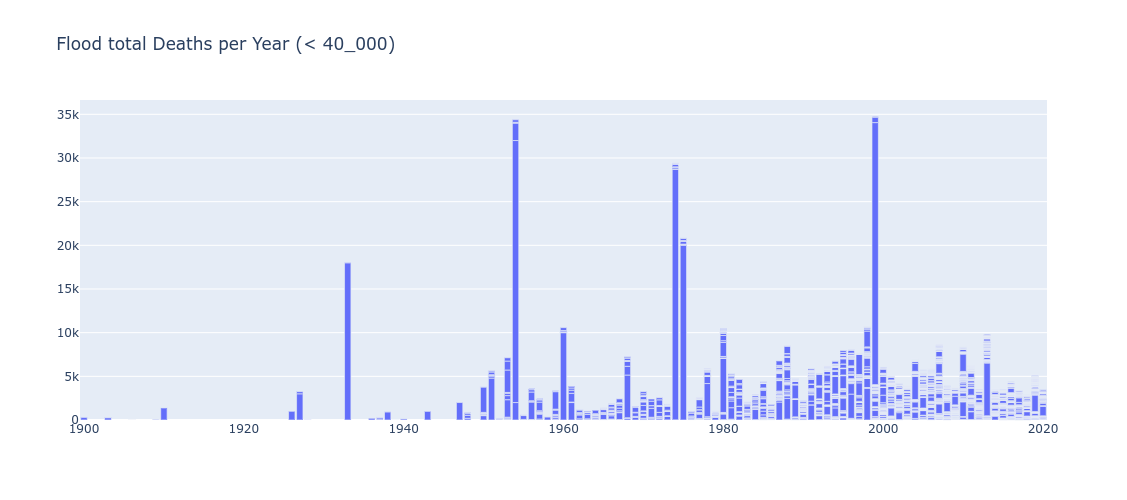

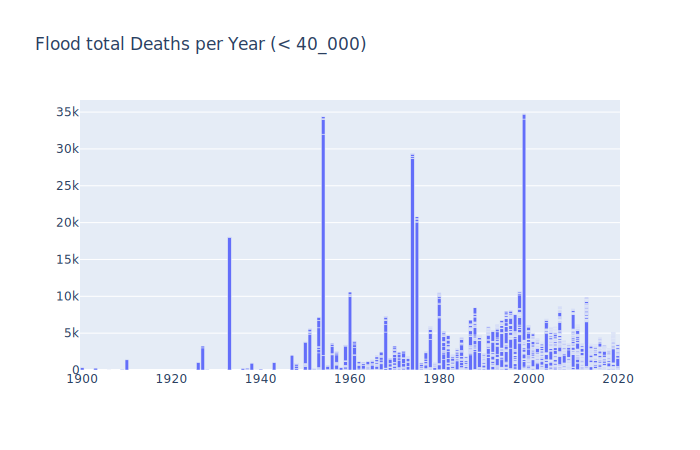

In [65]:
fig = go.Figure(
    data=[go.Bar(x=df_low_deaths["Year"], y=df_low_deaths["Total Deaths"])],
    layout_title_text="Flood total Deaths per Year (< 40_000)",
)
fig.update_layout(autosize=True, width=1024, height=500)  # For interactive plot
fig.show(renderer="svg")  # Static plot for GitHub

# Flood disasters count per years

In [73]:
len(df_low_deaths[df_low_deaths["Year"] < 1990])

743

In [74]:
len(df_low_deaths[(df_low_deaths["Year"] > 1990) & (df_low_deaths["Year"] < 2020)])

2991

In [16]:
df_disaster = df.groupby(["Year"]).count()

In [21]:
df_disaster.columns

Index(['Dis No', 'Seq', 'Disaster Group', 'Disaster Subgroup', 'Disaster Type',
       'Disaster Subtype', 'Disaster Subsubtype', 'Event Name',
       'Entry Criteria', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',
       'Appeal', 'Declaration', 'Aid Contribution', 'Dis Mag Value',
       'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin',
       'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month',
       'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Insured Damages ('000 US$)', 'Total Damages ('000 US$)', 'CPI'],
      dtype='object')

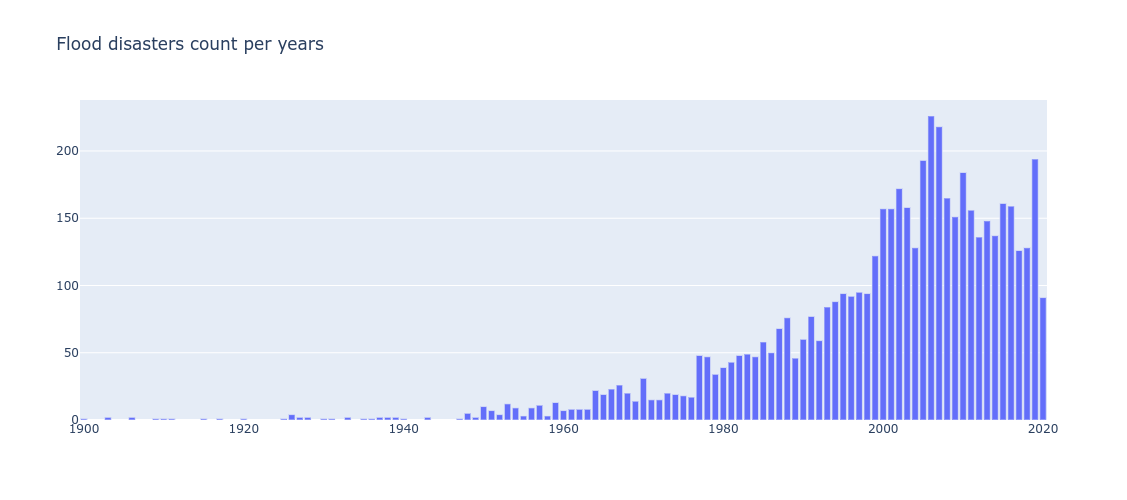

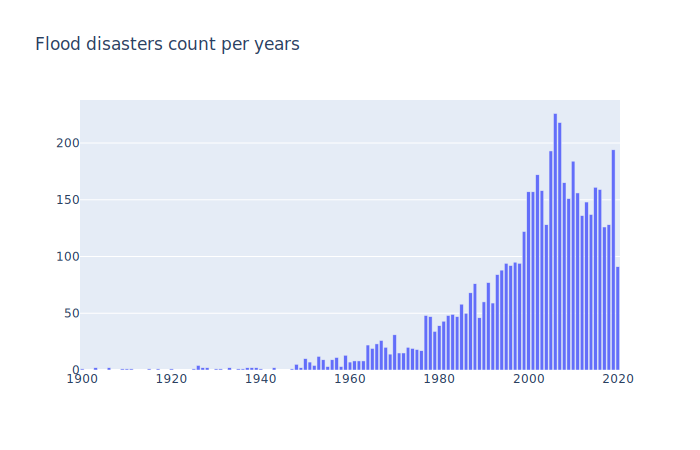

In [64]:
fig = go.Figure(
    data=[go.Bar(x=df_disaster.index, y=df_disaster["Seq"])],
    layout_title_text="Flood disasters count per years",
)
fig.update_layout(autosize=True, width=1024, height=500)  # For interactive plot
fig.show(renderer="svg")  # Static plot for GitHub

In [47]:
df_period = df.groupby(pd.cut(df["Year"], 12)).count()
df_period["Interval"] = df_period.index.astype(str)
df_period = df_period[["Interval", "Seq"]]
# df_period

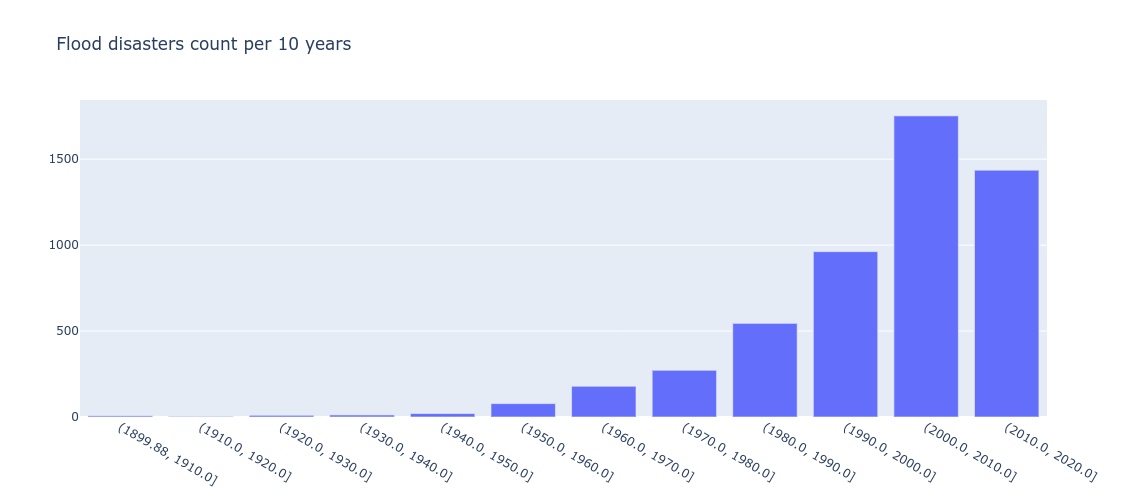

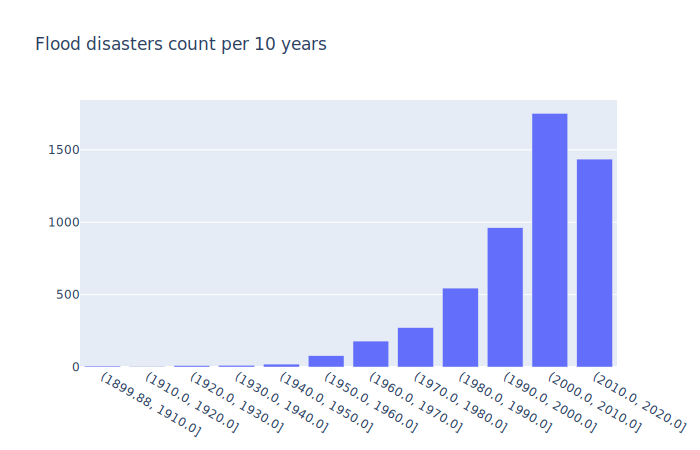

In [66]:
fig = go.Figure(
    data=[go.Bar(x=df_period["Interval"], y=df_period["Seq"])],
    layout_title_text="Flood disasters count per 10 years",
)
fig.update_layout(autosize=True, width=1024, height=500)  # For interactive plot
fig.show(renderer="svg")  # Static plot for GitHub

[(0.994, 3.0], (5.0, 7.0], (3.0, 5.0], (3.0, 5.0], (5.0, 7.0], (0.994, 3.0]]
Categories (3, interval[float64]): [(0.994, 3.0] < (3.0, 5.0] < (5.0, 7.0]]